# Introdução à Redes Neurais - V0.1

## Augusto Damasceno
* augustodamasceno@protonmail.com
* https://augustodamasceno.org/

<img src="img/1.png" alt="Áreas Relacionadas" width="400"/>
<img src="img/2.png" alt="Termos" width="400"/>

<img src="img/bio.png" alt="bio-euron" width="700"/>

<img src="img/an.png" alt="an" width="700"/>

In [82]:
# Pandas
import pandas as pd
# Numpy
import numpy as np 
# Pyplot is a state-based interface to matplotlib. It provides a MATLAB-like way of plotting.
import matplotlib.pyplot as plt
# Display plots that are the output of running code cells  
%matplotlib inline
# Set random seed for reproducibility
np.random.seed(24)

In [83]:
def activation(x, tp='sigmoid'):
    if tp == 'sigmoid':
        return 1/(1+np.exp(-1*x))
    elif tp == 'sign':
        return np.where(x < 0, -1, 1)

Text(0, 0.5, 'sign')

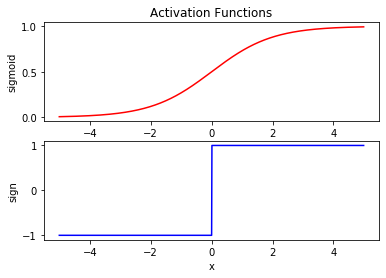

In [84]:
x1 = np.arange(-5, 5, 0.01)
sigmoid = activation(x1)
sign = activation(x1, tp='sign')

plt.subplot(2, 1, 1)
plt.plot(x1, sigmoid, 'r')
plt.title('Activation Functions')
plt.ylabel('sigmoid')

plt.subplot(2, 1, 2)
plt.plot(x1, sign, 'b')
plt.xlabel('x')
plt.ylabel('sign')

In [85]:
def neuron(x, w, b, actv='sigmoid'):
    return activation(np.dot(x, w) + b, tp=actv)

In [86]:
w = np.array([0.3, -0.4])
b = -1
x = np.array([[1, 5], [2, 3], [2.2, 6], [3, 5], [4, 3], [4.3, 1], [7, 3], [8, 2]])
y = np.array([-1, -1, -1, -1, 1, 1, 1, 1])
lr = 0.25

for i in range(100):
    k =  np.random.randint(0, 8)
    if (neuron(x[k], w, b, actv='sign') != y[k]):
        w += lr * y[k] * x[k]
        b += lr * y[k]
    
print('Pesos sinápticos: {},{}\nBias: {}\nTaxa de aprendizagem: {}'.format(w[0], w[1], b, lr))

Pesos sinápticos: 1.3,-1.4
Bias: -1.0
Taxa de aprendizagem: 0.25


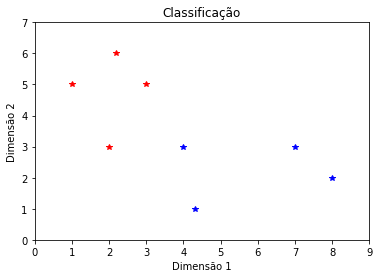

In [87]:
for i in range(8):
    ri = neuron(x[i], w, b, actv='sign')

    if ri == -1:
        color = 'r*'
    else:
        color = 'b*'

    fig = plt.plot(x[i, 0], x[i, 1], color)
    plt.title('Classificação')
    plt.xlabel('Dimensão 1')
    plt.ylabel('Dimensão 2')
    plt.axis((0,9,0,7))

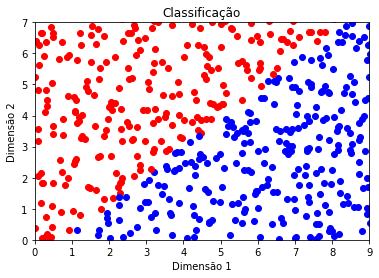

In [88]:
random_inputs = 10*np.random.rand(750, 2)
for i in range(750):
    ri = neuron(random_inputs[i], w, b, actv='sign')

    if ri == -1:
        color = 'ro'
    else:
        color = 'bo'

    plt.plot(random_inputs[i, 0], random_inputs[i, 1], color)
    plt.title('Classificação')
    plt.xlabel('Dimensão 1')
    plt.ylabel('Dimensão 2')
    plt.axis([0,9,0,7])

<img src="img/xor.png" alt="XOR" width="300"/>

In [89]:
w = np.random.rand(2)
b = np.random.rand(1)
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([-1, 1, 1, -1])
lr = 0.25

for i in range(100):
    k =  np.random.randint(0, 4)
    if (neuron(x[k], w, b, actv='sign') != y[k]):
        w += lr * y[k] * x[k]
        b += lr * y[k]
    
print('Pesos sinápticos: {},{}\nBias: {}\nTaxa de aprendizagem: {}'.format(w[0], w[1], b, lr))

Pesos sinápticos: 0.10601285416857142,0.13083655982913456
Bias: [-0.01312522]
Taxa de aprendizagem: 0.25


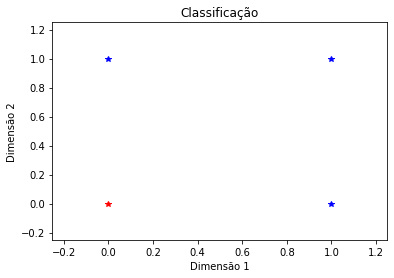

In [102]:
for i in range(4):
    ri = neuron(x[i], w, b, actv='sign')

    if ri == -1:
        color = 'r*'
    else:
        color = 'b*'

    fig = plt.plot(x[i, 0], x[i, 1], color)
    plt.title('Classificação')
    plt.xlabel('Dimensão 1')
    plt.ylabel('Dimensão 2')
    plt.axis((-0.25,1.25,-0.25,1.25))

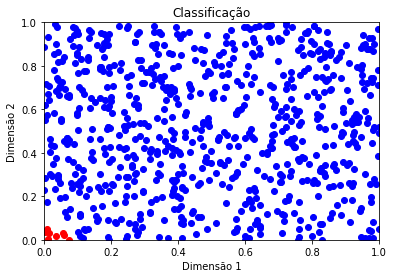

In [103]:
random_inputs = np.random.rand(750, 2)
for i in range(750):
    ri = neuron(random_inputs[i], w, b, actv='sign')

    if ri == -1:
        color = 'ro'
    else:
        color = 'bo'

    plt.plot(random_inputs[i, 0], random_inputs[i, 1], color)
    plt.title('Classificação')
    plt.xlabel('Dimensão 1')
    plt.ylabel('Dimensão 2')
    plt.axis([0,1,0,1])

<img src="img/3.jpg" alt="NN" width="400"/>

# https://playground.tensorflow.org

<img src="img/play.png" alt="NN" width="800"/>

# https://keras.io/api/

In [112]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [107]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
____

In [109]:
batch_size = 128
epochs = 1 # 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
54000/54000 [==============================] - 33s 607us/sample - loss: 0.1000 - acc: 0.9689 - val_loss: 0.0488 - val_acc: 0.9865


In [110]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.05170852299081161
Test accuracy: 0.9832


## Referências

1. [Kohonen, Teuvo. MATLAB Implementations and Aplications of the Self-Organizing Map. Unigrafia. 2014.](http://docs.unigrafia.fi/publications/kohonen_teuvo/MATLAB_implementations_and_applications_of_the_self_organizing_map.pdf)
2. Simon Haykin. Neural Networks: A Comprehensive Foundation (3rd Edition). Prentice-Hall, Inc., Upper Saddle River, NJ, USA, 2007.
3. https://towardsdatascience.com/revolution-of-artificial-intelligence-in-science-4047440a3cd0
4. https://towardsdatascience.com/artificial-intelligence-understanding-the-hype-daee0df04695
5. https://github.com/lexfridman/mit-deep-learning
6. https://ai.stanford.edu/
7. http://aima.cs.berkeley.edu/
8. https://stanford-cs221.github.io/spring2020/
9. Chrislb, ArtificialNeuronModel. CC BY-SA. Link: https://commons.wikimedia.org/wiki/File:ArtificialNeuronModel.png
10. Chuan-Zheng Lee, Stanford University. Logic gates. Link: https://web.stanford.edu/class/archive/engr/engr40m.1178/slides/logicgates.pdf
11. fchollet. Simple MNIST convnet. https://keras.io/examples/vision/mnist_convnet/